<a href="https://colab.research.google.com/github/YQ617/code-samples/blob/Data-Analysis-and-Visualization/Homework_4_Yanfei_Qin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
### Name: Yanfei Qin
### PennKey: yfqin
### PennID: 51386260

# Homework 4
This homework will require you to use HTTP requests to receive JSON objects through an API in the first section; and then clean real data from the open web in the second section. In both cases, rather than solely demonstrating your ability to work with Python, this homework also requires investigative skill, understanding how to extract structured data from a complicated external web-based source.


# Task 1: US Census Bureau API Calls (25 Points)

Use the documentation for the US Census Bureau API that we used in class.

https://www.census.gov/data/developers/data-sets/acs-1year.2018.html

The next several parts of this homework will help you attempt to answer the following question:

**In the United States, which state has the highest proportion of renters?**

To get that answer, we'll break up the problem into smaller sub-tasks.

### Part 1: Regional Geocodes (5 points)

You received a list of geocodes as part of this assignment. Create a new Python object, either a dictionary or Pandas dataframe, to store those geocodes for each unique state or territory in the United States, reading in from the provided CSV file.

In [ ]:
from google.colab import files
files.upload()

Saving geocodes.csv to geocodes.csv


{'geocodes.csv': b'summary_level,state,county,county_subdivision,place,consolidated_city,name\r\n010,00,000,00000,00000,00000,United States\r\n040,01,000,00000,00000,00000,Alabama\r\n050,01,001,00000,00000,00000,Autauga County\r\n050,01,003,00000,00000,00000,Baldwin County\r\n050,01,005,00000,00000,00000,Barbour County\r\n050,01,007,00000,00000,00000,Bibb County\r\n050,01,009,00000,00000,00000,Blount County\r\n050,01,011,00000,00000,00000,Bullock County\r\n050,01,013,00000,00000,00000,Butler County\r\n050,01,015,00000,00000,00000,Calhoun County\r\n050,01,017,00000,00000,00000,Chambers County\r\n050,01,019,00000,00000,00000,Cherokee County\r\n050,01,021,00000,00000,00000,Chilton County\r\n050,01,023,00000,00000,00000,Choctaw County\r\n050,01,025,00000,00000,00000,Clarke County\r\n050,01,027,00000,00000,00000,Clay County\r\n050,01,029,00000,00000,00000,Cleburne County\r\n050,01,031,00000,00000,00000,Coffee County\r\n050,01,033,00000,00000,00000,Colbert County\r\n050,01,035,00000,00000,00

In [ ]:
import pandas as pd
geocodes = pd.read_csv("geocodes.csv", encoding="utf-8", index_col='name')
geocodes

,summary_level,state,county,county_subdivision,place,consolidated_city
name,,,,,,
United States,10,0,0,0,0,0
Alabama,40,1,0,0,0,0
Autauga County,50,1,1,0,0,0
Baldwin County,50,1,3,0,0,0
Barbour County,50,1,5,0,0,0
...,...,...,...,...,...,...
Vega Baja Municipio,50,72,145,0,0,0
Vieques Municipio,50,72,147,0,0,0
Villalba Municipio,50,72,149,0,0,0


### Part 2: Choosing Variables (5 points)

Looking through the documentation from the ACS survey API, choose at least two variables that represent, or are direct proxies for, the following concepts (you can use more if you want, but you do not need to):

   * Total population of a state
   * Total quantity of owner-occupied housing (or conversely, total number of renter-occupied housing).

Make at least a sample API request to ensure that the variable has state-level data available.


I follow the video tutorials in https://www.census.gov/programs-surveys/acs/data/data-via-api.html in order to correctly locate the variables. I used the above provided (at the very beginning of Task 1) URL https://www.census.gov/data/developers/data-sets/acs-1year.2018.html to achieve this variable-listed html page https://api.census.gov/data/2018/acs/acs1/variables.html. And then I am able to locate several appropriate variables labels and names in the html page.


In [ ]:
import requests
url = "https://api.census.gov/data/2018/acs/acs1?get=NAME,B25026_001E,B25026_002E,B25026_009E&for=state:*"
response = requests.get(url)
if response.status_code == 200:
    json_response = response.json()
    pd.DataFrame(json_response).to_json("h_data.json")

In [ ]:
pip install census

In [ ]:
pip install us

     |████████████████████████████████| 132 kB 7.6 MB/s 
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11942 sha256=0b82456ff9272be44544863036bb031e016ca7df0a395ce6d38db2a04ef9abf9
  Stored in directory: /root/.cache/pip/wheels/ca/6b/11/cda9ea2438f721330a35c9a2c8e34b4aedcd34c89af48a4d00
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp37-cp37m-linux_x86_64.whl size=72175 sha256=486bcfc7fcb67035bc8377cc5849f1b070f15ba4a9d79d32a9e1f83f5dabbe50
  Stored in directory: /root/.cache/pip/wheels/a1/99/51/7de469e37cd1b3c763c24394e1ebf1baa2d79e094bf346cf80
Successfully built us jellyfish


In [ ]:
#sample API
from census import Census
from us import states

c = Census("1de05a8b12183461d3d5e3545f25dd0a9b0e6be4")
data2 = c.acs.get(('NAME','B25026_002E'),{'for':'state:*'},year=2018)
pd.DataFrame(data2)

#I later found that the values here are somewhat different from my result below, 
#the reason why the values are slightly different is that the package here uses acs5, while my fetch is acs1.
#I don't think it is necessary to adjust anything here since both are correct, I will resume my work below.

,NAME,B25026_002E,state
0,Mississippi,1976579.0,28
1,Missouri,4104047.0,29
2,Montana,707562.0,30
3,Nebraska,1285720.0,31
4,Nevada,1630950.0,32
5,New Hampshire,971783.0,33
6,New Jersey,5772234.0,34
7,New Mexico,1411420.0,35
8,New York,10836283.0,36
9,North Carolina,6540849.0,37


In [ ]:
pd.DataFrame(data2).to_csv('Sample API - Total population in occupied housing units!!Owner occupied_2018.csv')

### Part 3: Retrieving Values (10 points)

Once you've selected at least two variables that look appropriate, define in text for an exteranl audience: what exactly do those variables allow you to calculate, per state? For example, clarify whether your variables refer to housing units, individuals, or families, based on your best understanding of the API documentation.

Next, use the API to retrieve the value of these variables for each state, matching responses to state names using the geocodes from Task 1. If possible, use 2018 data. Store these retrieved results in a dictionary or Pandas dataframe.

In [ ]:
# Three variables I identified:
# Total population in occupied housing units
# Total population in occupied housing units, owner occupied
# Total population in occupied housing units, renter occupied
df_housing =  pd.read_json("h_data.json", encoding="utf-8").iloc[1:, :4]
df_housing.columns = ['STATE','TOTAL', 'OWNED', 'RENT']
df_housing.set_index(['STATE'], inplace=True)
df_housing = df_housing.astype('int64')
df_housing['PROPORTION OF RENTERS'] = df_housing['RENT'] / df_housing['TOTAL']
df_housing

,TOTAL,OWNED,RENT,PROPORTION OF RENTERS
STATE,,,,
Wisconsin,5668832,3998852,1669980,0.294590
Wyoming,563530,411209,152321,0.270298
Puerto Rico,3159695,2174343,985352,0.311850
Mississippi,2888470,1984280,904190,0.313034
Missouri,5952011,4154688,1797323,0.301969
Montana,1033340,725647,307693,0.297765
Nebraska,1878153,1314109,564044,0.300318
Nevada,2996777,1764464,1232313,0.411213
New Hampshire,1313916,991875,322041,0.245100


### Part 4: Ranking states by renter percentage (5 points)

Using the values you fetched in the previous task, calculate the approximate proportion of the population in each state that rents rather than lives in a home they own. Depending on what variables you selected, the exact quantity or ranking may differ from student to student.

To complete this section of the homework assignment, output that final calculated value for each state (they do not need to be sorted or visualized). Which state has the highest proportion of renters based on your calculation? Which state has the lowest proportion?



In [ ]:
print("Proportion of renters for each state: ")
print(df_housing)
print("State has the highest proportion of renters: ", df_housing.idxmax()['PROPORTION OF RENTERS'])
print("State has the lowest proportion of renters: ", df_housing.idxmin()['PROPORTION OF RENTERS'])

Proportion of renters for each state: 
                         TOTAL     OWNED      RENT  PROPORTION OF RENTERS
STATE                                                                    
Wisconsin              5668832   3998852   1669980               0.294590
Wyoming                 563530    411209    152321               0.270298
Puerto Rico            3159695   2174343    985352               0.311850
Mississippi            2888470   1984280    904190               0.313034
Missouri               5952011   4154688   1797323               0.301969
Montana                1033340    725647    307693               0.297765
Nebraska               1878153   1314109    564044               0.300318
Nevada                 2996777   1764464   1232313               0.411213
New Hampshire          1313916    991875    322041               0.245100
New Jersey             8726407   5842207   2884200               0.330514
New Mexico             2052505   1392519    659986               0.321551

### Answer - Part 4:
Based on my calculation, District of Columbia has the highest proportion of renters. New Hampshire has the lowest proportion of renters.

### Extra Credit

**For up to 3 points of extra credit, visualize the results of your investigation.**
   * Present your list of states in a figure showing the proportion of the population that owns their home vs. renting.
   * Sort that list in ascending or descending order in your figure.
   * Choose appropriate axes, labels, format, and color scheme to make your findings clear to an external audience.



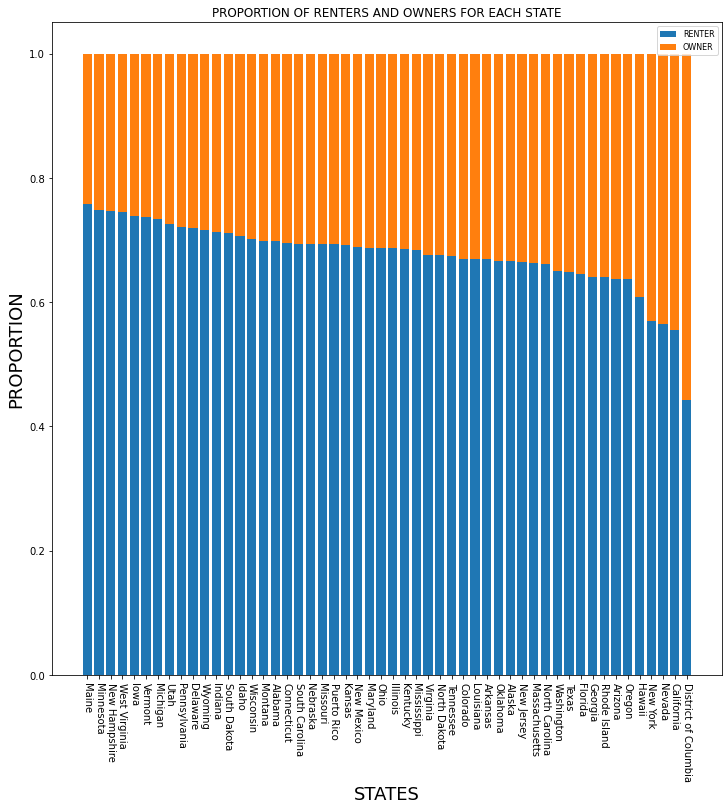

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
df_housing.sort_values(by = "PROPORTION OF RENTERS", inplace=True)
x_labels = df_housing.index
y1 = df_housing['PROPORTION OF RENTERS'].values
y2 = 1 - y1

plt.bar(x_labels, y2, label='RENTER')
plt.bar(x_labels,y1, label='OWNER', bottom=y2)
plt.xticks(rotation = 270, fontsize= 10)

plt.legend(fontsize = 8)
plt.xlabel('STATES', fontsize = 18)
plt.ylabel("PROPORTION", fontsize = 18)
plt.title("PROPORTION OF RENTERS AND OWNERS FOR EACH STATE")
plt.show()


# Task 2: Raw Data Cleanup from Wikipedia (25 Points)

Next, we will be scraping content from Wikipedia, which makes all public edits in the history of the wiki available through a public API. This API is documented at ​https://www.mediawiki.org/wiki/API:Main_page​ but you will not have to work with it directly; in code below we have given some helper functions that you can use to make things easier.


## Initial Help

We have already included a few functions below, which will allow you to call `​page_text()` in your code. This will fetch either the raw HTML of any Wikipedia page, or the plan text in either single string or list-of-strings format, and cache the result locally.

In [ ]:
import hashlib, os, json, requests
from lxml import etree
headers = {
    'Accept': 'application/json, text/javascript, */*; q=0.01',
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4421.5 Safari/537.36"
}
# Input: Page name of a Wikipedia article.
#
# Returns: Full HTML source of the named article if it exists,
#          or None if no such page exists.
def __api_GET_latest_page(title):
    parameters = {
        "action": "parse",
        "page": title,
        "format": "json"
    }
    response_json = __get("revisions", title, parameters)
    if("parse" in response_json.keys()
        and "text" in response_json["parse"].keys()
        and "*" in response_json["parse"]["text"].keys()):
        return response_json["parse"]["text"]["*"]
    return None

# Internal function to hide a caching API request into a single private function.
# This function will save you a lot of headaches in writing your own HTTP requests
# and will save the Wikimedia foundation some bandwidth since you'll fetch a local
# copy if you have already retrieved an article text at least once.
def __get(function_key, key, parameters, check_cache=True, write_cache=True):
    target = "https://en.wikipedia.org/w/api.php"
    cache_path = "cached_api"
    params_unicode = str(parameters).encode('utf-8')
    md5 = hashlib.md5(params_unicode).hexdigest()
    return_json = None

    cache_file = os.path.join(cache_path, function_key, md5)
    cache_exists = os.path.isfile(cache_file)
    if cache_exists:
        try:
            json_in = open(cache_file, "r")
            json_str = json_in.read()
            return_json = json.loads(json_str)
            if "error" in return_json.keys() and "code" in return_json["error"].keys() and return_json["error"]["code"]=="maxlag":
                cache_exists = False
        except:
            cache_exists = False

    if not cache_exists:
        cache_dir = os.path.dirname(cache_file)
        if not os.path.isdir(cache_dir):
            os.makedirs(cache_dir)
        print(target)
        print(parameters)
        r = requests.get(target, params=parameters, headers=headers)
        request_json = r.json()
        json_out = open(cache_file, "w")
        print(json.dumps(request_json), file=json_out)
        return_json = request_json
    return return_json

# This function takes as input a parsed HTML tree and returns the same
# tree but with a set of tags removed, mostly the contents of tables and scripts.
# This makes parsing the actual contents of a page easier.
def __remove_tables_and_scripts(tree):
    tags_to_remove = ["tbody", "td", "script"]
    for tag in tags_to_remove:
        elements = tree.find(f".//{tag}")
        if elements is not None:
            for e in elements:
                e.getparent().remove(e)
    return tree

# This function takes two required and one optional parameters as input.
#
# Required:
# name: Name of a Wikipedia page to retrieve.
# format: Type of content that you want returned. Options include:
#         "html" : Full HTML content of the page you requested.
#         "text" : Full content of the page you requested as a single string,
#                  with all HTML tags removed.
#         "list" : Full content of the page you requested with all HTML removed,
#                  but each paragraph on the page is a separate string, and the
#                  page as a whole is returned to you as a list of paragraphs.
#
# Optional:
# include_tables: By default, all tables and scripts in the HTML text will be
#                 removed from the text that gets sent back to you. If you want
#                 to include that content, you can pass in True instead.
#
# This function returns the content of the page in the format that you specified.
def page_text(name, format, include_tables = False):
    try:
        result = __api_GET_latest_page(name)
    except Exception as e:
        print("API request failed.")
        print(e)
    if result:
        e = etree.fromstring(result)
        if not include_tables:
            e = __remove_tables_and_scripts(e)
        if format == "html":
            return str(etree.tostring(e))
        elif format == "text":
            return ''.join(e.itertext())
        elif format == "list":
            return ''.join(e.itertext()).split('\n')
    else:
        print("Failed to retrieve a page.")
        return None


The `page_text()` function above is called with two parameters, first a page name and then a format. `text` will return the entire page's text as a single string, `html` will return the page including all HTML formatting, and `list` will return each line of the page as a separate string, all stored in a single list object.

In [ ]:
page_text("Ursula K. Le Guin", "text")

'American fantasy and science fiction author (1929–2018)\n\n\n.mw-parser-output .infobox-subbox{padding:0;border:none;margin:-3px;width:auto;min-width:100%;font-size:100%;clear:none;float:none;background-color:transparent}.mw-parser-output .infobox-3cols-child{margin:auto}\nUrsula Kroeber Le Guin (/ˈkroʊbər lə ˈɡwɪn/;[1] October 21, 1929 – January 22, 2018) was an American author best known for her works of speculative fiction, including science fiction works set in her Hainish universe, and the Earthsea fantasy series. She was first published in 1959, and her literary career spanned nearly sixty years, producing more than twenty novels and over a hundred short stories, in addition to poetry, literary criticism, translations, and children\'s books. Frequently described as an author of science fiction, Le Guin has also been called a "major voice in American Letters".[2] Le Guin herself said she would prefer to be known as an "American novelist".[3]\nLe Guin was born in Berkeley, Califor

In [ ]:
page_text("Ursula K. Le Guin", "html")

'b\'<div class="mw-parser-output"><div class="shortdescription nomobile noexcerpt noprint searchaux" style="display:none">American fantasy and science fiction author (1929&#8211;2018)</div>\\n<p class="mw-empty-elt">\\n</p>\\n<style data-mw-deduplicate="TemplateStyles:r1048617464">.mw-parser-output .infobox-subbox{padding:0;border:none;margin:-3px;width:auto;min-width:100%;font-size:100%;clear:none;float:none;background-color:transparent}.mw-parser-output .infobox-3cols-child{margin:auto}</style><table class="infobox vcard"><tbody/></table>\\n<p><b>Ursula Kroeber Le Guin</b> (<span class="rt-commentedText nowrap"><span class="IPA nopopups noexcerpt"><a href="/wiki/Help:IPA/English" title="Help:IPA/English">/<span style="border-bottom:1px dotted"><span title="/&#712;/: primary stress follows">&#712;</span><span title="\\\'k\\\' in \\\'kind\\\'">k</span><span title="\\\'r\\\' in \\\'rye\\\'">r</span><span title="/o&#650;/: \\\'o\\\' in \\\'code\\\'">o&#650;</span><span title="\\\'b\\\' i

In [ ]:
page_text("Ursula K. Le Guin", "list")

['American fantasy and science fiction author (1929–2018)',
 '',
 '',
 '.mw-parser-output .infobox-subbox{padding:0;border:none;margin:-3px;width:auto;min-width:100%;font-size:100%;clear:none;float:none;background-color:transparent}.mw-parser-output .infobox-3cols-child{margin:auto}',
 'Ursula Kroeber Le Guin (/ˈkroʊbər lə ˈɡwɪn/;[1] October 21, 1929 – January 22, 2018) was an American author best known for her works of speculative fiction, including science fiction works set in her Hainish universe, and the Earthsea fantasy series. She was first published in 1959, and her literary career spanned nearly sixty years, producing more than twenty novels and over a hundred short stories, in addition to poetry, literary criticism, translations, and children\'s books. Frequently described as an author of science fiction, Le Guin has also been called a "major voice in American Letters".[2] Le Guin herself said she would prefer to be known as an "American novelist".[3]',
 "Le Guin was born in B

## Featured Article Crawling

The English-language Wikipedia has over 5 million articles, and about 0.1% of those have been reviewed by the community as ​Featured Articles​, which represent the best quality content on the site. The full list of all featured articles is at the following URL:

https://en.wikipedia.org/wiki/Wikipedia:Featured_articles

The biography page for author Ursula K. Le Guin, which we fetched above, is one example of a featured article.

We are going to fetch the contents of the page `Wikipedia:Featured_articles` and build a dataframe with all featured article names and their categories. For instance, as of October 2020, the first featured article listed on this page was `7 World Trade Center` and its category is `Architecture and archaeology`. The last featured article listed on this page was `Henry Wrigley` and its category is `Warfare biographies`.




### Part 1: Retrieval (5 Points)
Fetch the contents of `Wikipedia: Featured_articles` in either string, HTML, or list format. Manually check the output to make sure you understand the contents and everything looks ready to go.

In [ ]:
wiki_url = "https://en.wikipedia.org/wiki/Wikipedia:Featured_articles"
wiki_con = page_text("Wikipedia:Featured_articles", format="list")
wiki_con

['',
 '',
 'List of all featured articles in English Wikipedia',
 '',
 '',
 '',
 '',
 '',
 '',
 'Contents',
 '',
 'Biographies are in sub-topics according to the larger topics',
 '',
 'Art, architecture, and archaeology (bios)',
 'Biology (bios)',
 'Business, economics, and finance',
 'Chemistry and mineralogy',
 'Computing',
 'Culture and society',
 'Education',
 'Engineering and technology',
 'Food and drink',
 'Geography and places',
 'Geology and geophysics',
 'Health and medicine',
 'Heraldry, honours, and vexillology',
 'History (bios)',
 'Language and linguistics',
 'Law (bios)',
 'Literature and theatre (bios)',
 'Mathematics (bios)',
 'Media (bios)',
 'Meteorology',
 'Music (bios)',
 'Philosophy and psychology',
 'Physics and astronomy (bios)',
 'Politics and government (bios)',
 'Religion, mysticism and mythology (bios)',
 'Royalty and nobility (bios)',
 'Sport and recreation (bios)',
 'Transport (bios)',
 'Video games',
 'Warfare (bios)',
 '',
 '',
 '',
 'Art, architecture, 


### Part 2: Removing Extra Information (5 points)

Using Python, find the start and end of the list of featured articles, and remove the content before and after that section of the page. You might use strategies similar to the Alice in Wonderland investigation from week 9, videos 4 and 5.


In [ ]:
textfile = open("content.txt", "w")
for element in wiki_con:
    textfile.write(element + "\n")
textfile.close()

#by this txt file I am able to locate where does the list of featured articles begins and ends.

In [ ]:
list_has_started = False
list_has_ended = False

lists = []

for i, line in enumerate(wiki_con):

  if "Art, architecture, and archaeology[edit]" in line:
    list_has_started = True

  if "Henry Wrigley\xa0\xa0(198\xa0articles)" in line:
    list_has_ended = True
  
  if list_has_started and not list_has_ended:
    lists.append(line)

In [ ]:
lists

['Art, architecture, and archaeology[edit]',
 'Architecture and archaeology[edit]',
 '7 World Trade Center\xa0–',
 'Acra (fortress)\xa0–',
 'Angkor Wat\xa0–',
 'Belton House\xa0–',
 'Benty Grange helmet\xa0–',
 'Biblioteca Marciana\xa0–',
 'Blakeney Chapel\xa0–',
 'Bodiam Castle\xa0–',
 'Borobudur\xa0–',
 'Bramall Hall\xa0–',
 'Bramshill House\xa0–',
 'Brougham Castle\xa0–',
 'Bruce Castle\xa0–',
 'Buckingham Palace\xa0–',
 'Buckton Castle\xa0–',
 'Buildings and architecture of Bristol\xa0–',
 'Buildings of Jesus College, Oxford\xa0–',
 'Buildings of Nuffield College, Oxford\xa0–',
 'Capon Chapel\xa0–',
 'Castell Coch\xa0–',
 'Castle\xa0–',
 'Cathedral of the Immaculate Conception (Moscow)\xa0–',
 "Catherine de' Medici's building projects\xa0–",
 'Cefnllys Castle\xa0–',
 'Ceilings of the Natural History Museum, London\xa0–',
 'Chartwell\xa0–',
 'Chestnuts Long Barrow\xa0–',
 'Chetro Ketl\xa0–',
 'Clemuel Ricketts Mansion\xa0–',
 'Coffin Stone\xa0–',
 'Coldrum Long Barrow\xa0–',
 'Const

### Part 3: Extracting Contents (10 points)

Write code that can perform the following tasks:

   * Distinguish page names from category headers in the raw text of the featured article list.
   * Keep track of the current category at all times while looping through contents, probably in a variable.
   * Extract page titles and store them as you iterate through page contents, associated with the current category.

IMPORTANT: You **DO NOT** need to parse HTML in order to complete this task. Using external libraries like BeautifulSoup might help if you want to use it, and if you ask colleagues for help they may suggest it. This is probably a bad idea, and will make your work more complicated than it needs to be.

In [ ]:
for i, line in enumerate(lists):
  if "[edit]" in line:
    print(f"--- Line {i}")
    print(line)

--- Line 0
Art, architecture, and archaeology[edit]
--- Line 1
Architecture and archaeology[edit]
--- Line 140
Art[edit]
--- Line 173
Paintings[edit]
--- Line 243
Biographies (art, architecture, and archaeology)[edit]
--- Line 297
Biology[edit]
--- Line 331
Fungi[edit]
--- Line 406
Plants[edit]
--- Line 473
Animals[edit]
--- Line 474
Mammals[edit]
--- Line 618
Birds[edit]
--- Line 815
Non-avian dinosaurs[edit]
--- Line 876
Reptiles, amphibians and stem-mammals[edit]
--- Line 912
Fish[edit]
--- Line 929
Invertebrates[edit]
--- Line 955
Biology biographies[edit]
--- Line 971
Business, economics, and finance[edit]
--- Line 983
Business, economics, and finance biographies[edit]
--- Line 991
Companies[edit]
--- Line 997
Numismatics[edit]
--- Line 1096
Chemistry and mineralogy[edit]
--- Line 1110
Elements[edit]
--- Line 1136
Compounds[edit]
--- Line 1143
Chemistry and mineralogy biographies[edit]
--- Line 1146
Computing[edit]
--- Line 1157
Culture and society[edit]
--- Line 1229
Culture and 

In [ ]:
lists = pd.DataFrame(lists)
lists.columns=['All_contents']
lists

,All_contents
0,"Art, architecture, and archaeology[edit]"
1,Architecture and archaeology[edit]
2,7 World Trade Center –
3,Acra (fortress) –
4,Angkor Wat –
...,...
6139,John Whittle –
6140,Maurice Wilder-Neligan –
6141,Richard Williams (RAAF officer) –
6142,John Wilton (general) –


In [ ]:
page_title = lists.query("All_contents.str.contains('–')",engine='python')
page_title

,All_contents
2,7 World Trade Center –
3,Acra (fortress) –
4,Angkor Wat –
5,Belton House –
6,Benty Grange helmet –
...,...
6139,John Whittle –
6140,Maurice Wilder-Neligan –
6141,Richard Williams (RAAF officer) –
6142,John Wilton (general) –


In [ ]:
categories = lists[~lists.isin(page_title)]
categories = categories.dropna(how='all')
# I find out that there are some non-category elements in the df, need to get them out and put them into the page_title
categories_final = categories.query("All_contents.str.contains('edit')",engine='python') 
categories_final

,All_contents
0,"Art, architecture, and archaeology[edit]"
1,Architecture and archaeology[edit]
140,Art[edit]
173,Paintings[edit]
243,"Biographies (art, architecture, and archaeolog..."
...,...
5286,Military equipment[edit]
5328,Military ships[edit]
5588,Military units[edit]
5658,"Wars, battles and events[edit]"


In [ ]:
categories_final.to_csv('categories_final.csv')
#just to make sure we get all categories correctly

In [ ]:
false_categories = categories.query("~All_contents.str.contains('edit')",engine='python') 
false_categories

,All_contents
139,Withypool Stone Circle (138 articles)
172,Weather Machine (32 articles)
242,"Youth on the Prow, and Pleasure at the Helm (..."
296,John Michael Wright (53 articles)
330,Wells and Wellington affair (33 articles)
...,...
5285,York City War Memorial (41 articles)
5327,Vultee Vengeance in Australian service (41 ar...
5587,Yugoslav torpedo boat T7 (259 articles)
5657,Yeomanry Cavalry (69 articles)


In [ ]:
false_categories.to_csv('false_categories.csv')
#just to make sure they are all non-categories element that we need to put back into page_title

In [ ]:
page_title_final = lists[~lists.isin(categories_final)]
page_title_final = page_title_final.dropna(how='all')
page_title_final

,All_contents
2,7 World Trade Center –
3,Acra (fortress) –
4,Angkor Wat –
5,Belton House –
6,Benty Grange helmet –
...,...
6139,John Whittle –
6140,Maurice Wilder-Neligan –
6141,Richard Williams (RAAF officer) –
6142,John Wilton (general) –


In [ ]:
len(false_categories)+len(page_title) == len(page_title_final)
# it proves we add them all back to the final page_title

False

In [ ]:
len(categories_final)+ len(page_title_final) == len(lists)
# proves all the process is in the right track

True

In [ ]:
categories_final

,All_contents
0,"Art, architecture, and archaeology[edit]"
1,Architecture and archaeology[edit]
140,Art[edit]
173,Paintings[edit]
243,"Biographies (art, architecture, and archaeolog..."
...,...
5286,Military equipment[edit]
5328,Military ships[edit]
5588,Military units[edit]
5658,"Wars, battles and events[edit]"


In [ ]:
# The categories are just too complicated: there are general categories, sub categories, 
# and even second-sub categories (for example, mammals in anmials in biology, as shown in the original website).
# I will need make three different lists of these categories in order to differ them from each other.
# However, it is nearly impossible to process them by using refering to the list we fetched from the website, 
# and we have not learned anything about this, I tried to search online for help but also failed,
# thus, I will distinguish them by refering to the original website. Hope this method is not too complicated for you... I tried my best.
Gen_Cat=[
    'Art, architecture, and archaeology[edit]',
    'Biology[edit]',
    'Business, economics, and finance[edit]',
    'Chemistry and mineralogy[edit]',
    'Computing[edit]',
    'Culture and society[edit]',
    'Education[edit]',
    'Engineering and technology[edit]',
    'Food and drink[edit]',
    'Geography and places[edit]',
    'Geology and geophysics[edit]',
    'Health and medicine[edit]',
    'Heraldry, honors, and vexillology[edit]',
    'History[edit]',
    'Language and linguistics[edit]',
    'Law[edit]',
    'Literature and theatre[edit]',
    'Mathematics[edit]',
    'Media[edit]',
    'Meteorology and climate[edit]',
    'Music[edit]',
    'Philosophy and psychology[edit]',
    'Physics and astronomy[edit]',
    'Politics and government[edit]',
    'Religion, mysticism and mythology[edit]',
    'Royalty and nobility[edit]',
    'Sport and recreation[edit]',
    'Transport[edit]',
    'Video games[edit]',
    'Warfare[edit]',
]
#I just need two lists, Gen and 2nd-sub categories to distinguish all 3 types of categories.
SecSub_Cat = [
          'Paintings[edit]',
          'Mammals[edit]',
          'Birds[edit]',
          'Non-avian dinosaurs[edit]',
          'Reptiles, amphibians and stem-mammals[edit]',
          'Fish[edit]',
          'Invertebrates[edit]',
          'Individuals[edit]',
          'Groups[edit]'
]

In [ ]:
Gen_Ca = categories_final.query("All_contents in @Gen_Cat")
Gen_Ca = Gen_Ca.rename(columns={'All_contents':'General_Categories'})
Gen_Ca

,General_Categories
0,"Art, architecture, and archaeology[edit]"
297,Biology[edit]
971,"Business, economics, and finance[edit]"
1096,Chemistry and mineralogy[edit]
1146,Computing[edit]
1157,Culture and society[edit]
1267,Education[edit]
1298,Engineering and technology[edit]
1357,Food and drink[edit]
1378,Geography and places[edit]


In [ ]:
SecSub_Ca = categories_final.query("All_contents in @SecSub_Cat")
SecSub_Ca = SecSub_Ca.rename(columns={'All_contents':'Second_Sub_Categories'})
SecSub_Ca

,Second_Sub_Categories
173,Paintings[edit]
474,Mammals[edit]
618,Birds[edit]
815,Non-avian dinosaurs[edit]
876,"Reptiles, amphibians and stem-mammals[edit]"
912,Fish[edit]
929,Invertebrates[edit]
3385,Individuals[edit]
3492,Groups[edit]


In [ ]:
Sub_Ca = categories_final.drop(Gen_Ca.index, errors = 'ignore', axis = 0)
Sub_Ca_final = Sub_Ca.drop(SecSub_Ca.index, errors = 'ignore', axis = 0)
Sub_Ca_final = Sub_Ca_final.rename(columns={'All_contents':'Sub_Categories'})
Sub_Ca_final

,Sub_Categories
1,Architecture and archaeology[edit]
140,Art[edit]
243,"Biographies (art, architecture, and archaeolog..."
331,Fungi[edit]
406,Plants[edit]
...,...
5286,Military equipment[edit]
5328,Military ships[edit]
5588,Military units[edit]
5658,"Wars, battles and events[edit]"


In [ ]:
len(Gen_Ca)+len(SecSub_Ca)+len(Sub_Ca_final) == len(categories_final)
#prove I have sorted them into three different types now

True

In [ ]:
cat_and_pagetitle = pd.concat([Gen_Ca,Sub_Ca_final,SecSub_Ca,page_title_final],axis=1)
cat_and_pagetitle = cat_and_pagetitle.rename(columns={'All_contents':'Page_Titles'})

In [ ]:
cat_and_pagetitle['General_Categories'] = cat_and_pagetitle['General_Categories'].ffill()
cat_and_pagetitle['Sub_Categories'] = cat_and_pagetitle['Sub_Categories'].ffill()
cat_and_pagetitle

,General_Categories,Sub_Categories,Second_Sub_Categories,Page_Titles
0,"Art, architecture, and archaeology[edit]",NaN,NaN,NaN
1,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,NaN
2,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,7 World Trade Center –
3,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,Acra (fortress) –
4,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,Angkor Wat –
...,...,...,...,...
6139,Warfare[edit],Warfare biographies[edit],NaN,John Whittle –
6140,Warfare[edit],Warfare biographies[edit],NaN,Maurice Wilder-Neligan –
6141,Warfare[edit],Warfare biographies[edit],NaN,Richard Williams (RAAF officer) –
6142,Warfare[edit],Warfare biographies[edit],NaN,John Wilton (general) –


In [ ]:
cat_and_pagetitle.to_csv('cat_and_pagetitle.csv')

I used this csv file to investigate if anything goes wrong with the dataframe, and find out that the column Second_Sub_Categories need some more manipulations.

For example:
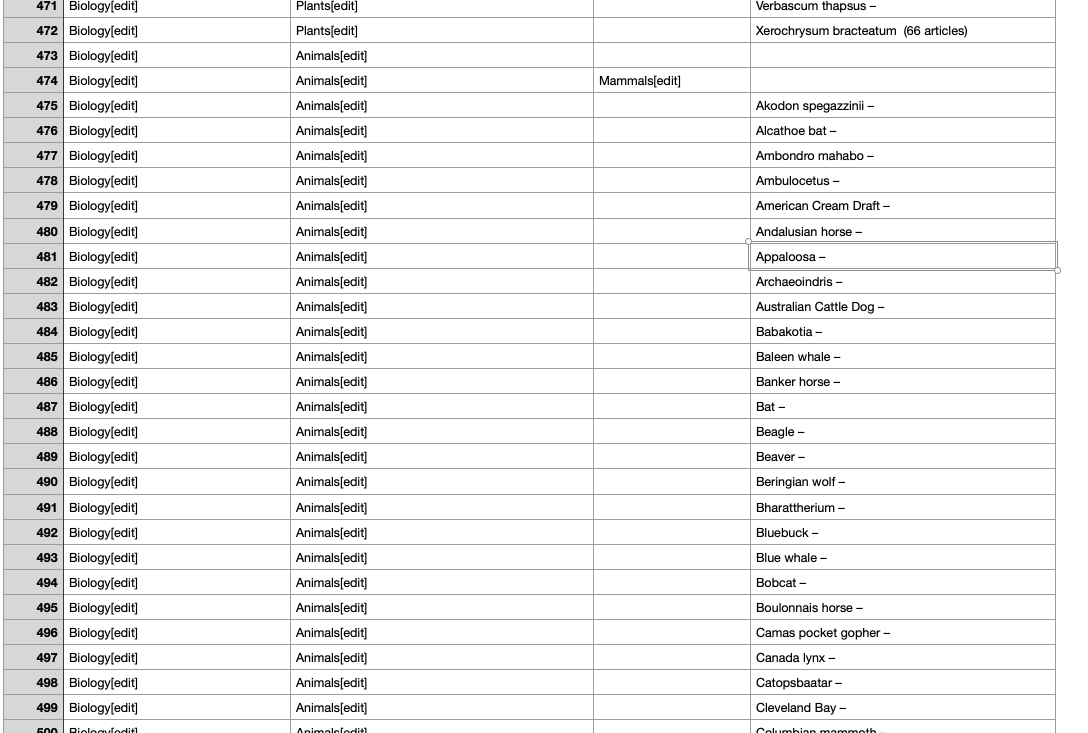
it seems like there are NA values in the page_title columns, more importantly, the Second_Sub column need to be ffilled. However, it is not OK to forward fill all the NA values, thus, I need to find to forward fill until which page_title based on the original website, and clean the dataset accordingly. Since this is a step of dataset cleaning, I will write it down under the following quesiton.

### Part 4: Building a dataframe (5 points)

Store the filtered contents of the featured article list in a structured dataframe named `articles_df`. This should contain the list of featured articles on Wikipedia. Each row should represent one featured article and should contain two columns:

   * `page_title`
   * `category`

These values should have been found by your extraction code in Part 3.

Save the resulting dataframe to a CSV file and submit it along with your Python notebook to complete this homework.

In [ ]:
# The instruction asked for two-column dataframe, however, I believe it is not correct according to the original website
# I will try to complete a four-column dataframe here that has three layers of categories, just like the website does
articles_df = cat_and_pagetitle
articles_df

,General_Categories,Sub_Categories,Second_Sub_Categories,Page_Titles
0,"Art, architecture, and archaeology[edit]",NaN,NaN,NaN
1,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,NaN
2,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,7 World Trade Center –
3,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,Acra (fortress) –
4,"Art, architecture, and archaeology[edit]",Architecture and archaeology[edit],NaN,Angkor Wat –
...,...,...,...,...
6139,Warfare[edit],Warfare biographies[edit],NaN,John Whittle –
6140,Warfare[edit],Warfare biographies[edit],NaN,Maurice Wilder-Neligan –
6141,Warfare[edit],Warfare biographies[edit],NaN,Richard Williams (RAAF officer) –
6142,Warfare[edit],Warfare biographies[edit],NaN,John Wilton (general) –


In [ ]:
painting = articles_df.iloc[173:243].ffill()
painting

,General_Categories,Sub_Categories,Second_Sub_Categories,Page_Titles
173,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],NaN
174,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],After the Deluge (painting) –
175,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Annunciation (Memling) –
176,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Anthony Roll –
177,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Beaune Altarpiece –
...,...,...,...,...
238,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Whaam! –
239,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Witches' Sabbath (The Great He-Goat) –
240,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],The World Before the Flood –
241,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],The Wrestlers (Etty) –


In [ ]:
articles_df.update(painting)

In [ ]:
articles_df.iloc[173:243] #SUCCESS!!! Rows like row 173 will be deleted altogether later

,General_Categories,Sub_Categories,Second_Sub_Categories,Page_Titles
173,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],NaN
174,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],After the Deluge (painting) –
175,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Annunciation (Memling) –
176,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Anthony Roll –
177,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Beaune Altarpiece –
...,...,...,...,...
238,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Whaam! –
239,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],Witches' Sabbath (The Great He-Goat) –
240,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],The World Before the Flood –
241,"Art, architecture, and archaeology[edit]",Art[edit],Paintings[edit],The Wrestlers (Etty) –


In [ ]:
Mammals = articles_df.iloc[474:618].ffill()
articles_df.update(Mammals)

In [ ]:
Birds = articles_df.iloc[618:815].ffill()
articles_df.update(Birds)

In [ ]:
dinosaurs = articles_df.iloc[815:876].ffill()
articles_df.update(dinosaurs)

In [ ]:
Reptiles = articles_df.iloc[876:912].ffill()
articles_df.update(Reptiles)

In [ ]:
Fish = articles_df.iloc[912:929].ffill()
articles_df.update(Fish)

In [ ]:
Invertebrates = articles_df.iloc[929:955].ffill()
articles_df.update(Invertebrates)

In [ ]:
Individuals = articles_df.iloc[3385:3492].ffill()
articles_df.update(Individuals)

In [ ]:
Groups = articles_df.iloc[3492:3531].ffill()
articles_df.update(Groups)

In [ ]:
#After I assign Second Sub Categories to those page titles that actually have one
#I need to deal with the rows that include NaN value in the page_titles column like to following one:
articles_df.iloc[3492]

General_Categories                   Music[edit]
Sub_Categories           Music biographies[edit]
Second_Sub_Categories               Groups[edit]
Page_Titles                                  NaN
Name: 3492, dtype: object

In [ ]:
articles_df = articles_df[articles_df['Page_Titles'].notna()] #Now I have done all the work

In [ ]:
articles_df.to_csv('articles_df.csv')
#articles_df will have many NaN values in the column of Second-Sub Categories,
#and it is normal, because according to the original website there are only 9 Sec-Sub Cats,
#which means the majority of page_titles won't have a value in the Sec-Sub Cat column.

#Please do forgive me if the code seems too long for you, but I do believe it is the most perfect dataset that fit with the original website, by having three layers of categories
#Since there is only a final project to come, I want to thank you here for reading all my codes and works this semester. Truly appreciate it:)

### Extra credit (Task 2)

**For up to 2 points of credit, you may answer the following question:**
   * What is the count and percentage distribution of categories in Wikipedia featured articles? Use `.groupby()` on the `category` column that you filled in while constructing your dataframe.

**For up to 5 additional points of extra credit, you may complete the following task**:
   * Write a loop that fetches the contents of every page in `articles_df`, and stores the fetched page in your dataframe in a new column named `page_contents`. Use `try / except` to skip pages that fail to load.